# Aula 06 - Data Discovery e Data Visualization

O objetivo dessa aula é trabalhar com Plotly Express e/ou Seaborn e com o dataset do Portal da Transparência do GDF. 

Fonte dos dados: http://www.transparencia.df.gov.br/#/downloads  
Mês de referência: 04/2022

***

Passo a Passo  
1 - Introdução ao Plotly com exemplos  
2 - Introdução ao Seaborn com exemplos  
3 - Análise dos dados do Portal da Transparência  


In [32]:
# Importando Plotly Express e trabalhando com datasets básicos 
import plotly.express as px

## 1 - Introdução ao Plotly com exemplos  

Biblioteca de gráficos exemplos do Plotly Express
https://plotly.com/python/plotly-express/

Tem exemplos de linhas, barras, colunas, scatter, pizza, treemap, sunburst, etc.

### Entendendo nosso dataset exemplo - GapMinder

In [33]:
# Vamos usar o GapMinder, um dataset interno do Plotly que contém a expectativa de vida x PIB para todos os países (1952-2007)
data = px.data.gapminder()

In [34]:
data

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [35]:
data_brazil = data[data.country == 'Brazil']
data_brazil

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
168,Brazil,Americas,1952,50.917,56602560,2108.944355,BRA,76
169,Brazil,Americas,1957,53.285,65551171,2487.365989,BRA,76
170,Brazil,Americas,1962,55.665,76039390,3336.585802,BRA,76
171,Brazil,Americas,1967,57.632,88049823,3429.864357,BRA,76
172,Brazil,Americas,1972,59.504,100840058,4985.711467,BRA,76
173,Brazil,Americas,1977,61.489,114313951,6660.118654,BRA,76
174,Brazil,Americas,1982,63.336,128962939,7030.835878,BRA,76
175,Brazil,Americas,1987,65.205,142938076,7807.095818,BRA,76
176,Brazil,Americas,1992,67.057,155975974,6950.283021,BRA,76
177,Brazil,Americas,1997,69.388,168546719,7957.980824,BRA,76


### Gráficos básicos em Plotly Express

### Gráfico de Barras

In [36]:
fig = px.bar(data_brazil, x='year', y='pop').show()

In [37]:
# Gráfico de Barras com expectativa de vida no Brasil entre 1952 e 2007

fig = px.bar(data_brazil, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp',
             labels={'pop':'População total do Brasil', 'year': 'Ano'}, height=400)
fig.show()

### Gráfico de bolha 

In [38]:
# Gráfico de bolha com dados do PIB x Expectativa de vida para todos os dados do dataset Gapminder relativos ao ano de 2007

gapminder = px.data.gapminder()

fig = px.scatter(gapminder.query("year==2007"), x="gdpPercap", y="lifeExp", size="pop", color="continent",
           hover_name="country", log_x=True, size_max=60)
fig.show()

### Gráfico scatter 

In [39]:
# Gráfico com animação separados por continente

fig = px.scatter(gapminder, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])
fig.show()

### Gráfico Choropleth

In [40]:
px.choropleth(gapminder, locations="iso_alpha", color="lifeExp", hover_name="country", animation_frame="year",
              color_continuous_scale=px.colors.sequential.Plasma, projection="natural earth")

### Gráfico Treeemap

In [41]:
# Gráfico TreeMap

gap2007 = px.data.gapminder().query("year == 1952")

fig = px.treemap(gap2007, path=[px.Constant('world'), 'continent', 'country'], values='pop', color='lifeExp')
fig.show()

## 2 - Introdução ao Seaborn

Exemplos: https://seaborn.pydata.org/examples/index.html

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

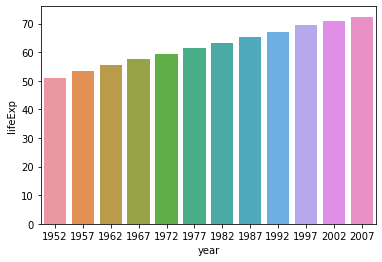

In [43]:
sns.barplot(x=data_brazil["year"], y=data_brazil["lifeExp"])
plt.show()

<AxesSubplot:xlabel='year', ylabel='lifeExp'>

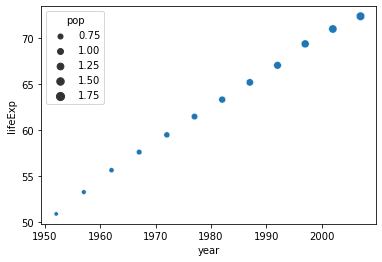

In [45]:
sns.scatterplot(x=data_brazil["year"], y=data_brazil["lifeExp"], size=data_brazil["pop"])

<AxesSubplot:>

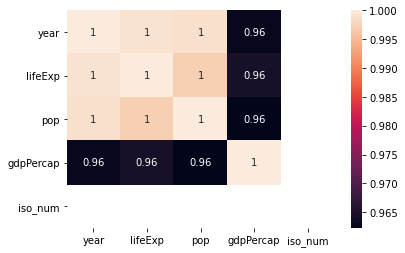

In [46]:
sns.heatmap(data_brazil.corr(), annot=True)

## 3 - Análise dos dados do Portal da Transparência do GDF


Neste botebook vamos fazer várias análises dos dados do portal da transparência do GDF. Vamos tentar responder algumas perguntas como:
- Qual órgão tem a maior folha de pagamento
- Quais os TOP 10 maiores salários
- Qual órgão tem a maior média salarial
- TOP 15 salários do GDF
- TOP 15 nomes mais comuns
- TOP 10 salários da Procuradoria Geral do Distrito Federal
- Salários Terracap maiores que 30 mil reais
- TOP 10 nomes mais comuns no serviço público

Fonte dos dados: http://www.transparencia.df.gov.br/#/downloads 

Mês de referência: 04/2022


### 3.1- Importando os Dados

In [47]:
# Leitura do arquivo Remuneracao_2021_03 (março de 2021)
# Contém aproximadamente 82 MB
# 239 mil registros

import pandas as pd
df = pd.read_csv("Remuneracao_2022_04.csv", encoding='iso-8859-1',sep=';', decimal=',') #nrows=10000 é opcional

In [49]:
df.describe(include='all')

,NOME,ÓRGÃO,CARGO,FUNÇÃO,SITUAÇÃO,REMUNERAÇÃO BÁSICA,LICENÇA PRÊMIO,BRUTO,LÍQUIDO
count,233737,233737,226720,225565,233737,233737.000000,233737.000000,233737.000000,233737.000000
unique,218037,108,1032,1137,42,NaN,NaN,NaN,NaN
top,MARIA JOSE DA SILVA ...,SECRETARIA DE ESTADO DE EDUCACAO ...,PROFESSOR DE EDUC. BASICA,...,ATIVO,NaN,NaN,NaN,NaN
freq,29,66245,46547,170738,116526,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,8126.783398,192.659538,10432.179770,8055.133539
std,NaN,NaN,NaN,NaN,NaN,5677.126846,2697.354789,7853.947727,6134.901569
min,NaN,NaN,NaN,NaN,NaN,-9607.990000,0.000000,-747.230000,-133168.680000
25%,NaN,NaN,NaN,NaN,NaN,4878.210000,0.000000,5859.900000,4770.060000
50%,NaN,NaN,NaN,NaN,NaN,7499.020000,0.000000,9267.740000,7135.210000
75%,NaN,NaN,NaN,NaN,NaN,10321.630000,0.000000,12448.100000,9707.880000


O describe nos traz uma visão geral dos dados. Exemplo:
- Existem 233.737 salários no arquivo  
- A média salarial (líquida) é de 8055 reais 
- O maior valor é de 398.351 reais e normalmente se refere a pessoa que acabou de aposentar e recebeu a licença-prêmio.   
- Outro valor interessante é que o arquivo possui salários negativos, no caso uma pessoa teve o salário de -133.168 reais. Vamos verificar isso mais adiante na nossa análise.
- Existem 108 órgãos  
- Podemos também verificar a existência de 66.245 funcionários na Secretaria de Estado de Educação

In [50]:
# Informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233737 entries, 0 to 233736
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   NOME                233737 non-null  object 
 1   ÓRGÃO               233737 non-null  object 
 2   CARGO               226720 non-null  object 
 3   FUNÇÃO              225565 non-null  object 
 4   SITUAÇÃO            233737 non-null  object 
 5   REMUNERAÇÃO BÁSICA  233737 non-null  float64
 6   LICENÇA PRÊMIO      233737 non-null  float64
 7   BRUTO               233737 non-null  float64
 8   LÍQUIDO             233737 non-null  float64
dtypes: float64(4), object(5)
memory usage: 16.0+ MB


### 3.2 - Iniciando a limpeza dos dados, remoção de colunas e criação de grupos de dados

A limpeza pode ser feita utilizando Python, Excel, R, ou qualquer outra ferramenta que seja familiar.
Aqui fiz apenas uma remoção simples de colunas no Excel. Abaixo é feita apenas uma verificação das colunas de interesse.

In [20]:
df

,NOME,ÓRGÃO,CARGO,FUNÇÃO,SITUAÇÃO,REMUNERAÇÃO BÁSICA,LICENÇA PRÊMIO,BRUTO,LÍQUIDO
0,JULIANA MAIA SOUSA ...,SECRETARIA DE ESTADO DE DESENVOLVIMENTO URBANO...,,ASSESSOR ...,ATIVO,0.0,0.0,3334.50,2970.86
1,LUCAS MUNIZ MATIAS DE SANTANA ...,SECRETARIA DE ESTADO DE DESENVOLVIMENTO URBANO...,,DIRETOR ...,ATIVO,0.0,0.0,4655.77,3813.62
2,ADILSON BRITO DE CARVALHO ...,SECRETARIA DE ESTADO DE DESENVOLVIMENTO URBANO...,,ASSESSOR ...,ATIVO,0.0,0.0,2352.00,2318.40
3,ALLEF GUARNIER ARAUJO FARIA ...,SECRETARIA DE ESTADO DE DESENVOLVIMENTO URBANO...,,DIRETOR ...,ATIVO,0.0,0.0,5079.50,4237.35
4,MATEUS LEANDRO DE OLIVEIRA ...,SECRETARIA DE ESTADO DE DESENVOLVIMENTO URBANO...,,SECRETARIO DE ESTADO ...,ATIVO,0.0,0.0,18432.62,13153.72
...,...,...,...,...,...,...,...,...,...
233732,NILSON DA SILVA PIRES,CAESB - COMPANHIA DE SANEAMENTO AMBIENTAL DO D...,CONSELHEIRO,CONSELHEIRO,CONSELHEIRO,0.0,0.0,4413.76,3680.53
233733,PAULO ROBERTO ALONSO VIEGAS,CAESB - COMPANHIA DE SANEAMENTO AMBIENTAL DO D...,CONSELHEIRO,CONSELHEIRO,CONSELHEIRO,0.0,0.0,4413.76,4056.80
233734,ANA PAULA CARDOSO DA SILVA,CAESB - COMPANHIA DE SANEAMENTO AMBIENTAL DO D...,CONSELHEIRO,CONSELHEIRO,CONSELHEIRO,0.0,0.0,4413.76,4056.80
233735,JULIO CESAR FATURETO DE BRITO,CAESB - COMPANHIA DE SANEAMENTO AMBIENTAL DO D...,CONSELHEIRO,CONSELHEIRO,CONSELHEIRO,0.0,0.0,4413.76,3680.53


#### Verificando os valores nulos das colunas

In [53]:
df.isna().sum()

NOME                     0
ÓRGÃO                    0
CARGO                 7017
FUNÇÃO                8172
SITUAÇÃO                 0
REMUNERAÇÃO BÁSICA       0
LICENÇA PRÊMIO           0
BRUTO                    0
LÍQUIDO                  0
dtype: int64

Podemos ver que a tabela apresenta dados bem limpos e com poucos "missing values". Apenas Cargo e Função possuem valores vazios, mas considerando um total de 233 mil registros, o valor de nulos é bem aceitável.

Caso se opte por realizar o tratamento dos valores nulos, temos as seguintes opções:  
1 - Excluir valores ausentes: df.dropna(axis=0)  
2 - Preencher com a mediana (colunas numéricas): df.fillna(df["LÍQUIDO"], inplace=True)  
3 - Preencher com valores mais frequentes (colunas categóricas): df.fillna(df["CARGO"].value_counts()[0])

### 3.3 - Gráficos
#### 1 - TOP 10 salários do GDF
***

In [54]:
TOP10_SALARIOS = df.sort_values(by='LÍQUIDO', ascending=False).head(10)
TOP10_SALARIOS

,NOME,ÓRGÃO,CARGO,FUNÇÃO,SITUAÇÃO,REMUNERAÇÃO BÁSICA,LICENÇA PRÊMIO,BRUTO,LÍQUIDO
204236,MARCUS PAULO KOBOLDT,POLICIA MILITAR DO DISTRITO FEDERAL - SIAPE,CORONEL,S/NIVEL FUNCAO,APOSENTADO,19378.47,381434.21,404412.68,398351.03
204850,DISNEY LUIZ MARTINS,POLICIA MILITAR DO DISTRITO FEDERAL - SIAPE,MAJOR,S/NIVEL FUNCAO,APOSENTADO,17346.29,328974.25,349577.20,344944.40
202375,HERCULES FERREIRA DOS SANTOS,POLICIA MILITAR DO DISTRITO FEDERAL - SIAPE,SUBTENENTE,S/NIVEL FUNCAO,APOSENTADO,10376.48,262159.86,274478.88,271649.65
202212,JOSE ORLANDO INOCENCIO,POLICIA MILITAR DO DISTRITO FEDERAL - SIAPE,PRIMEIRO SARGENTO,S/NIVEL FUNCAO,APOSENTADO,9406.19,252686.05,263855.74,261386.56
202504,LUIZ ANTONIO GOMES,POLICIA MILITAR DO DISTRITO FEDERAL - SIAPE,SUBTENENTE,S/NIVEL FUNCAO,APOSENTADO,10376.48,249840.84,262159.86,259388.57
205442,MARIA EDILEUZA MARQUES SANTOS,POLICIA MILITAR DO DISTRITO FEDERAL - SIAPE,SEGUNDO SARGENTO,S/NIVEL FUNCAO,APOSENTADO,8112.57,245831.86,255460.50,253510.26
205384,VIRGILIO AUGUSTO ARAUJO,POLICIA MILITAR DO DISTRITO FEDERAL - SIAPE,PRIMEIRO SARGENTO,S/NIVEL FUNCAO,APOSENTADO,9420.25,243618.16,254801.91,252227.72
203372,ANTONIO CARLOS DA SILVA LACERDA,POLICIA MILITAR DO DISTRITO FEDERAL - SIAPE,PRIMEIRO SARGENTO,S/NIVEL FUNCAO,APOSENTADO,9406.19,242390.93,254360.62,251723.58
204545,CLAUDIA MARIA RODRIGUES,POLICIA MILITAR DO DISTRITO FEDERAL - SIAPE,SUBTENENTE,S/NIVEL FUNCAO,APOSENTADO,10376.48,241628.16,253947.18,251025.28
202884,JAIR COSTA CARVALHO,POLICIA MILITAR DO DISTRITO FEDERAL - SIAPE,PRIMEIRO SARGENTO,S/NIVEL FUNCAO,APOSENTADO,9406.19,238723.94,249893.63,247827.97


In [55]:
fig = px.bar(TOP10_SALARIOS, x="NOME", y="LÍQUIDO", color="LÍQUIDO").show()

####  2 - TOP 10 nomes homônimos mais comuns
***

In [56]:
# Nomes completos mais comuns
homonimos = df["NOME"].value_counts().head(10)
homonimos

MARIA JOSE DA SILVA                                   29
MARIA APARECIDA DA SILVA                              20
MARIA APARECIDA DE OLIVEIRA                           17
JOAO BATISTA DA SILVA                                 15
MARIA DE LOURDES SILVA                                15
MARIA APARECIDA DOS SANTOS                            14
MARIA DE FATIMA DA SILVA                              13
VERA LUCIA DA SILVA                                   13
MARIA PEREIRA DA SILVA                                12
MARIA DE LOURDES DA SILVA                             12
Name: NOME, dtype: int64

In [57]:
fig = px.bar(homonimos, x='NOME', color=homonimos.index).show()

#### 3 - Top 5 órgãos em número de servidores
***

In [58]:
empresas = df['ÓRGÃO'].value_counts()
empresas

SECRETARIA DE ESTADO DE EDUCACAO                                                    66245
SECRETARIA DE ESTADO DE SAUDE                                                       52988
POLICIA MILITAR DO DISTRITO FEDERAL - SIAPE                                         27403
INSTITUTO DE PREVIDENCIA DOS SERVIDORES DO DISTRITO FEDERAL                         17033
SECRETARIA DE ESTADO DE EDUCACAO - TEMPORARIO                                       13007
                                                                                    ...  
CEB PARTICIPACOES S.A.                                                                  7
BRB-DISTR.TIT.E VAL.MOBIL.S.A.                                                          6
FUNDO CAPITALIZADO DOS SERVIDORES DO DISTRITO FEDERAL                                   6
COMPANHIA BRASILIENSE DE GAS - CEBGAS                                                   6
BRB-CRED, FINANC. E INV. S.A.                                                           6
Name: ÓRGÃ

In [59]:
empresas.index

Index(['SECRETARIA DE ESTADO DE EDUCACAO                                                ',
       'SECRETARIA DE ESTADO DE SAUDE                                                   ',
       'POLICIA MILITAR DO DISTRITO FEDERAL - SIAPE',
       'INSTITUTO DE PREVIDENCIA DOS SERVIDORES DO DISTRITO FEDERAL                     ',
       'SECRETARIA DE ESTADO DE EDUCACAO - TEMPORARIO                                   ',
       'POLICIA CIVIL DO DISTRITO FEDERAL - SIAPE',
       'POLICIA CIVIL DO DISTRITO FEDERAL                                               ',
       'SECRETARIA DE ESTADO DE ECONOMIA DO DISTRITO FEDERAL                            ',
       'SECRETARIA DE ESTADO DE JUSTICA E CIDADANIA                                     ',
       'BRB-BANCO DE BRASILIA S.A.',
       ...
       'INSTITUTO DE ASSISTENCIA A SAUDE DOS SERVIDORES DO DISTRITO FEDERAL-INAS        ',
       'FUNDO DE MELHORIA DA GESTAO PUBLICA - PRO-GESTAO                                ',
       'CEB LAJEADO S/A', '

In [60]:
empresas.index.str.rstrip()
top5empresas = empresas.head(5)
fig = px.pie(top5empresas, values='ÓRGÃO', names=top5empresas.index, title='TOP 5 órgãos em número de servidores', color=top5empresas.index).show()

#### 4 - Analista de TI com salários acima de 30 mil no BRB

In [72]:
brb = df[(df['CARGO'] == 'ANALISTA DE TECNOLOGIA DA INFORMAÇÃO') & (df['ÓRGÃO'] == 'BRB-BANCO DE BRASILIA S.A.') & (df["LÍQUIDO"]> 30000)]   
brb

,NOME,ÓRGÃO,CARGO,FUNÇÃO,SITUAÇÃO,REMUNERAÇÃO BÁSICA,LICENÇA PRÊMIO,BRUTO,LÍQUIDO
190490,ANDRE TEIXEIRA SATURNINO,BRB-BANCO DE BRASILIA S.A.,ANALISTA DE TECNOLOGIA DA INFORMAÇÃO,ANALISTA TECNOLÓGICO SÊNIOR,AFASTADO/ABONO ASSIDUIDADE,11725.53,0.0,37655.20,31085.89
190632,ALAN DE FARIAS CRUZ,BRB-BANCO DE BRASILIA S.A.,ANALISTA DE TECNOLOGIA DA INFORMAÇÃO,GERENTE DE PROJETOS TECNOLÓGICO,AFASTADO/DOENÇA,10472.33,0.0,36298.10,30101.07
192307,ELAINE CRISTINE MATOS SUNDFELD,BRB-BANCO DE BRASILIA S.A.,ANALISTA DE TECNOLOGIA DA INFORMAÇÃO,GERENTE DE NÚCLEO TECNOLÓGICO,TRABALHANDO,11185.56,0.0,41195.13,32851.33
192309,LIDIANE DE ANDRADE PARISI,BRB-BANCO DE BRASILIA S.A.,ANALISTA DE TECNOLOGIA DA INFORMAÇÃO,CONSULTOR DE DIRETORIA,TRABALHANDO,11185.56,0.0,50266.73,42141.63
192311,ESTEVAO AGUIAR CRISPIM,BRB-BANCO DE BRASILIA S.A.,ANALISTA DE TECNOLOGIA DA INFORMAÇÃO,GERENTE DE ÁREA TECNOLÓGICA,TRABALHANDO,11060.46,0.0,48101.25,39249.18
192312,THIAGO FIGUEIREDO MARQUES LEITE,BRB-BANCO DE BRASILIA S.A.,ANALISTA DE TECNOLOGIA DA INFORMAÇÃO,GERENTE DE ÁREA TECNOLÓGICA,TRABALHANDO,9478.74,0.0,41522.66,32768.55
192347,DAVI GOMES GULART,BRB-BANCO DE BRASILIA S.A.,ANALISTA DE TECNOLOGIA DA INFORMAÇÃO,GERENTE DE NÚCLEO TECNOLÓGICO,TRABALHANDO,11060.46,0.0,41943.41,32826.88
192356,BRUNO ALVES TEIXEIRA,BRB-BANCO DE BRASILIA S.A.,ANALISTA DE TECNOLOGIA DA INFORMAÇÃO,SUPERINTENDENTE TECNOLÓGICA,TRABALHANDO,11060.46,0.0,68528.17,54261.09
192363,JOAO CESAR MOURA DE SOUSA,BRB-BANCO DE BRASILIA S.A.,ANALISTA DE TECNOLOGIA DA INFORMAÇÃO,AUDITOR TECNOLÓGICO,TRABALHANDO,11060.46,0.0,42152.37,33521.62
192367,LESSANDRO GELAIN CASAGRANDE,BRB-BANCO DE BRASILIA S.A.,ANALISTA DE TECNOLOGIA DA INFORMAÇÃO,GERENTE DE ÁREA TECNOLÓGICA,TRABALHANDO,10936.81,0.0,44456.75,35394.00


In [80]:
brb_por_funcao = brb["FUNÇÃO"].value_counts()
brb_por_funcao
fig = px.pie(brb_por_funcao, values='FUNÇÃO', names=brb_por_funcao.index, title='Cargos com mais funcionários com salário maiores que R$30.000', hole=.4, color=brb_por_funcao.index).show()

#### 5 - Salários negativos por órgão

In [94]:
negativo = df[df['LÍQUIDO']<0]
negativo_grafico = negativo['ÓRGÃO'].value_counts().to_frame()
negativo_grafico

,ÓRGÃO
CAESB - COMPANHIA DE SANEAMENTO AMBIENTAL DO DISTRITO FEDERAL,10
CENTRAIS DE ABASTECIMENTO DO DISTRITO FEDERAL S/A,3
POLICIA CIVIL DO DISTRITO FEDERAL - SIAPE,2
POLICIA MILITAR DO DISTRITO FEDERAL - SIAPE,2


In [100]:
#fig = px.bar(negativo_grafico, x=negativo_grafico["ÓRGÃO"]).show()
fig = px.pie(negativo_grafico, values='ÓRGÃO', names=negativo_grafico.index, hole=0.4).show()